In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Missing data
Missing data occurs when values are simply absent or contain NaN **(Not a Number) for any feature(Fredrik säger attribut, feature property)** (column) in a given dataset.

This will cause issues with many machine learning algorithms.

**Missing data can negatively impact:**
- Data visualization
- Arithmetic computations
- Machine learning algorithms

**Common methods to deal with missing data:**
- Remove rows or columns containing missing data
- Impute(***tillskriva***) with mean or median
- Impute with mode (most frequently occuring feature)
- Impute with forward or backward fill
- Interpolate data between two points

*Note: Domain knowledge is often needed to decide how to fill nulls.*

In [12]:
df = pd.DataFrame(np.random.randn(10, 4), columns=["A", "B", "C", "D"])
df = df[df > 0] # NaN - Not a Number
df

,A,B,C,D
0,0.781284,0.025779,NaN,0.677735
1,NaN,0.045703,0.872136,0.613890
2,1.167825,1.326536,0.581832,0.868742
3,NaN,0.386321,NaN,1.035160
4,0.071996,NaN,0.477238,1.006522
5,NaN,NaN,NaN,NaN
6,0.323806,NaN,NaN,0.380857
7,0.687867,1.362224,1.242335,NaN
8,NaN,0.580435,NaN,0.248800
9,NaN,1.612420,0.231282,2.862068


In [21]:
copy = df.copy()
copy.drop(columns="D", inplace=True)
copy

,A,B,C
0,0.781284,0.025779,NaN
1,NaN,0.045703,0.872136
2,1.167825,1.326536,0.581832
3,NaN,0.386321,NaN
4,0.071996,NaN,0.477238
5,NaN,NaN,NaN
6,0.323806,NaN,NaN
7,0.687867,1.362224,1.242335
8,NaN,0.580435,NaN
9,NaN,1.612420,0.231282


## dropna
Remove rows (by default), or columns, containing null.

**Parameters**
- **how** = "any" (default), or "all"
- **thresh** = set number of (non-missing) values a row must contain in orteer to *not* drop.
- **subset** = only look for NaN in subset of columns (or rows)
- **axis** = "index" (default), or "columns"

In [32]:
copy.dropna(how="all") # how="any" tar bort alla rader som innehåller NaN, how="all" tar bort rader som bara innehåller NaN
copy
copy.dropna(thresh=2)

,A,B,C
0,0.781284,0.025779,NaN
1,NaN,0.045703,0.872136
2,1.167825,1.326536,0.581832
4,0.071996,NaN,0.477238
7,0.687867,1.362224,1.242335
9,NaN,1.612420,0.231282


### fillna
Fill missing values.

In [65]:
copy = df.copy()
# copy.fillna(44545) # Fill every NA in dataframe with value 44545
copy["A"].fillna(copy["A"].mean(), inplace=True)
# copy["B"].mode()[0] # Mainly for categorical data
copy["B"].ffill(inplace=True) # Forwards fill
copy["D"].bfill(inplace=True) # Backwards fill
copy["C"].interpolate(inplace=True)
copy


,A,B,C,D
0,0.781284,0.025779,NaN,0.677735
1,0.606556,0.045703,0.872136,0.613890
2,1.167825,1.326536,0.581832,0.868742
3,0.606556,0.386321,0.529535,1.035160
4,0.071996,0.386321,0.477238,1.006522
5,0.606556,0.386321,0.732270,0.380857
6,0.323806,0.386321,0.987303,0.380857
7,0.687867,1.362224,1.242335,0.248800
8,0.606556,0.580435,0.736809,0.248800
9,0.606556,1.612420,0.231282,2.862068


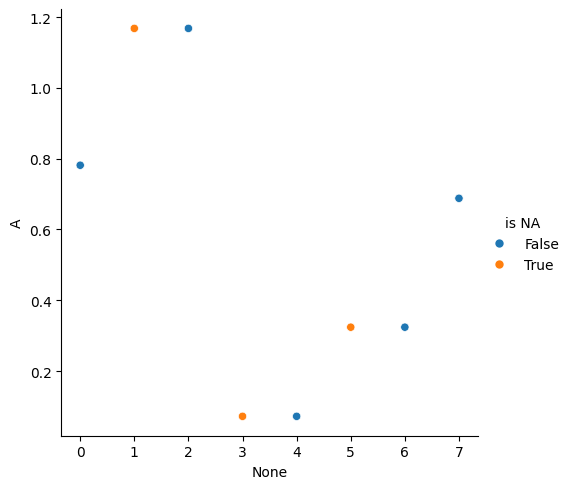

In [76]:
copy = df.copy()
copy["is NA"] = copy["A"].isna()
copy["A"].bfill(inplace=True)
sns.relplot(x=copy.index, y="A", hue="is NA", data=copy)